# Police dataset brief EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_police = pd.read_csv("./datasets/police.csv")

df_police.head(5)

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [3]:
df_police.shape

(65535, 15)

In [4]:
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

In [5]:
df_police.describe()

,country_name,driver_age_raw,driver_age
count,0.0,61481.000000,61228.000000
mean,NaN,1967.791106,34.148984
std,NaN,121.050106,12.760710
min,NaN,0.000000,15.000000
25%,NaN,1965.000000,23.000000
50%,NaN,1978.000000,31.000000
75%,NaN,1985.000000,43.000000
max,NaN,8801.000000,88.000000


## 1. Instruction ( For Data Cleaning ) - Remove the column that only contains missing values.

In [6]:
df_police.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [7]:
df_police.isnull().sum() / len(df_police) * 100

stop_date               0.000000
stop_time               0.000000
country_name          100.000000
driver_gender           6.196689
driver_age_raw          6.186007
driver_age              6.572061
driver_race             6.195163
violation_raw           6.195163
violation               6.195163
search_conducted        0.000000
search_type            96.217288
stop_outcome            6.195163
is_arrested             6.195163
stop_duration           6.195163
drugs_related_stop      0.000000
dtype: float64

In [8]:
df_police.drop('country_name', axis=1, inplace=True)

In [10]:
df_police.drop('search_type', axis=1, inplace=True)

In [11]:
df_police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

## 2. Question ( Based on Filtering + Value Counts ) - For Speeding , were Men or Women stopped more often ?

In [13]:
df_police['driver_gender'].value_counts()

driver_gender
M    45164
F    16310
Name: count, dtype: int64

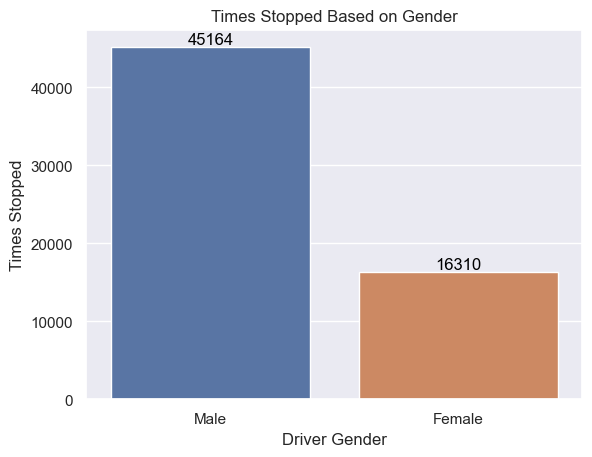

In [27]:
sns.set_theme(style='darkgrid')
# ax = df_police['driver_gender'].value_counts().plot(kind='bar')
ax = sns.countplot(df_police, x=df_police['driver_gender'])
ax.bar_label(ax.containers[0], color='black')
plt.title("Times Stopped Based on Gender")
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.xlabel("Driver Gender")
plt.ylabel("Times Stopped")
plt.show()

In [86]:
df_police[df_police['violation'] == 'Speeding']['driver_gender'].value_counts()

driver_gender
M    25517
F    11686
Name: count, dtype: int64

In [87]:
speeding_violation = df_police[df_police['violation'] == 'Speeding']['driver_gender'].value_counts()

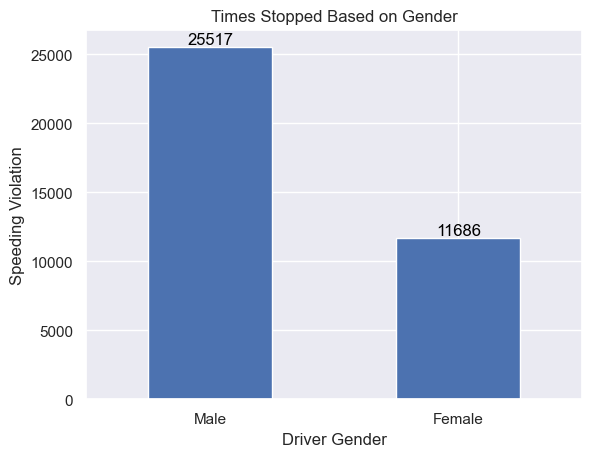

In [96]:
sns.set_theme(style='darkgrid')
ax = df_police[df_police['violation'] == 'Speeding']['driver_gender'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], color='black')
plt.title("Times Stopped Based on Gender")
plt.xticks(ticks=[0,1], labels=['Male', 'Female'], rotation=360)
plt.xlabel("Driver Gender")
plt.ylabel("Speeding Violation")
plt.show()

## 3. Question ( Groupby ) - Does gender affect who gets searched during a stop ?

In [28]:
df_police.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop'],
      dtype='object')

In [31]:
df_police.groupby('search_conducted')['driver_gender'].value_counts()

search_conducted  driver_gender
False             M                43051
                  F                15944
True              M                 2113
                  F                  366
Name: count, dtype: int64

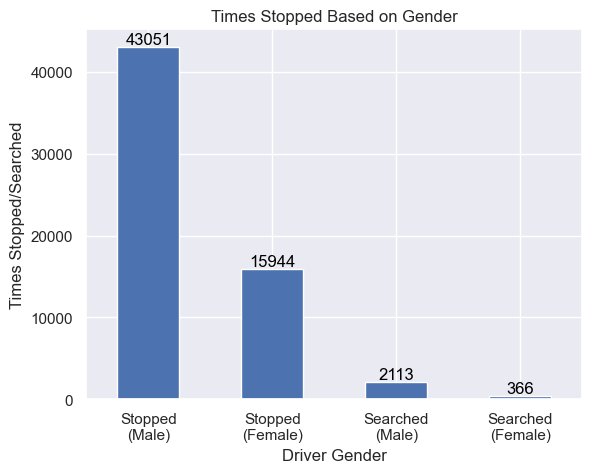

In [42]:
# ax = df_police['driver_gender'].value_counts().plot(kind='bar')
ax = df_police.groupby('search_conducted')['driver_gender'].value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0], color='black')
plt.title("Times Stopped Based on Gender")
plt.xticks(ticks=[0,1,2,3], labels=['Stopped\n(Male)', 'Stopped\n(Female)', 'Searched\n(Male)', 'Searched\n(Female)'], rotation=360)
plt.xlabel("Driver Gender")
plt.ylabel("Times Stopped/Searched")
plt.show()

In [98]:
df_police.groupby('driver_gender')['search_conducted'].sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

## 4. Question ( mapping + data-type casting ) - What is the mean stop_duration ?

In [43]:
df_police.sample(5)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
34606,5/9/2009,18:05,F,1968.0,41.0,Hispanic,APB,Other,False,Citation,False,16-30 Min,False
26246,5/29/2008,22:45,F,1986.0,22.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
3638,2/2/2006,8:25,F,1962.0,44.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False
19469,8/17/2007,23:44,M,1941.0,66.0,White,Speeding,Speeding,False,Citation,False,16-30 Min,False
9367,8/22/2006,12:10,M,1979.0,27.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False


In [44]:
df_police['stop_duration'].value_counts()

stop_duration
0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: count, dtype: int64

In [46]:
df_police[df_police['stop_duration'] == '2']

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
55873,1/23/2012,11:17,M,1960.0,52.0,Black,Other Traffic Violation,Moving violation,False,Arrest Passenger,True,2,False


In [48]:
df_police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   driver_gender       61474 non-null  object 
 3   driver_age_raw      61481 non-null  float64
 4   driver_age          61228 non-null  float64
 5   driver_race         61475 non-null  object 
 6   violation_raw       61475 non-null  object 
 7   violation           61475 non-null  object 
 8   search_conducted    65535 non-null  bool   
 9   stop_outcome        61475 non-null  object 
 10  is_arrested         61475 non-null  object 
 11  stop_duration       61475 non-null  object 
 12  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(2), object(9)
memory usage: 5.6+ MB


In [47]:
stop_duration_dict = {
    '0-15 Min' : 15,
    '16-30 Min' : 30,
    '30+ Min' : 60,
    '2' : 2
}

In [100]:
df_police.insert(12, 'stop_duration_min', df_police['stop_duration'].map(stop_duration_dict))

ValueError: cannot insert stop_duration_min, already exists

In [51]:
type(df_police['stop_duration_min'][0])

numpy.float64

(array([1.0000e+00, 0.0000e+00, 4.7379e+04, 0.0000e+00, 1.1448e+04,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.6470e+03]),
 array([ 2. ,  7.8, 13.6, 19.4, 25.2, 31. , 36.8, 42.6, 48.4, 54.2, 60. ]),
 <BarContainer object of 10 artists>)

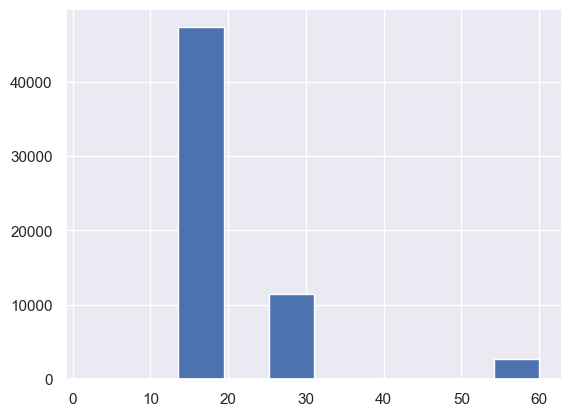

In [53]:
plt.hist(df_police['stop_duration_min'])

In [52]:
df_police['stop_duration_min'].mean()

19.730736071573812

## 5. Question ( Groupby , Describe ) - Compare the age distributions for each violation.

In [77]:
df_police.groupby('violation')['driver_age'].mean()

violation
Equipment              31.682957
Moving violation       36.736443
Other                  40.362381
Registration/plates    32.656696
Seat belt              30.333333
Speeding               33.262581
Name: driver_age, dtype: float64

In [57]:
df_police.groupby('violation')['driver_age'].describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


<Axes: xlabel='driver_age', ylabel='Density'>

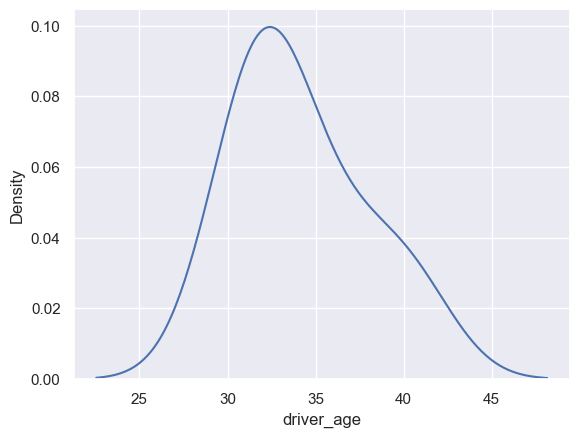

In [60]:
sns.kdeplot(df_police.groupby('violation')['driver_age'].mean())